In [1]:

# Imports
import math

import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.preprocessing import LabelEncoder
import numpy as np



In [2]:
housingdf = pd.read_csv('AmesHousing.csv')
housingdf.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
print('Our training dataset has {} rows and {} columns.'.format(housingdf.shape[0], housingdf.shape[1]))

Our training dataset has 2930 rows and 82 columns.


In [4]:
#numerical & categorical columns 
catcols = housingdf.select_dtypes('object').columns
numcols = housingdf.select_dtypes('number').columns
print("Categorical variable count: ", len(catcols))
print("Numerical variable count: ", len(numcols))


Categorical variable count:  43
Numerical variable count:  39


In [5]:
print("Categorical variables: ", catcols)
print("Numerical variables: ", numcols)


Categorical variables:  Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')
Numerical variables:  Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', 

### Exploratory Data Analysis 

Intuitively, to begin our analysis we would like to see the trend in Sales prices 

The cheapest house sold for $12,789 and the most expensive for $755,000
The average sales price is $180,796, while median is $160,000


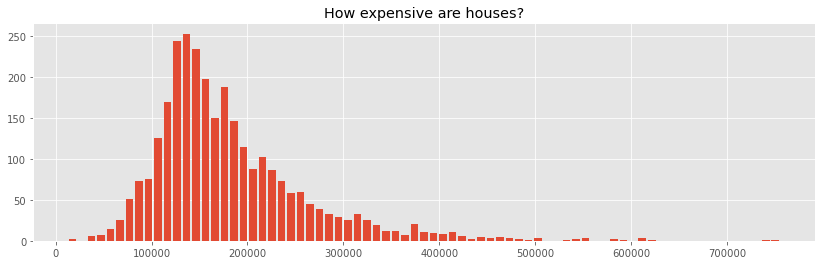

In [6]:
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    housingdf.SalePrice.min(), housingdf.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    housingdf.SalePrice.mean(), housingdf.SalePrice.median()))
housingdf.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

We would also like to examine when were the houses built?

Oldest house built in 1872. Newest house built in 2010.


Text(0.5, 1.0, 'When were the houses built?')

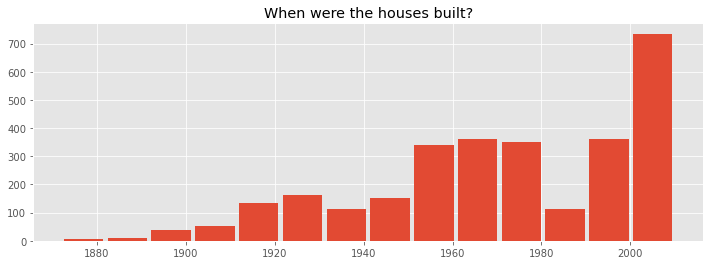

In [7]:

print('Oldest house built in {}. Newest house built in {}.'.format(housingdf['Year Built'].min(), housingdf['Year Built'].max()))
housingdf['Year Built'].hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')


Also, looking at the dataset we can think certain features that would have an impact on the Sales Price of the house. Lets visualize some of these features 
1. Overall Quality
2. Living Area
3. Garage Area
4. neighbourhood

The average house has 1,500 sq ft of space, the median 1,442 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


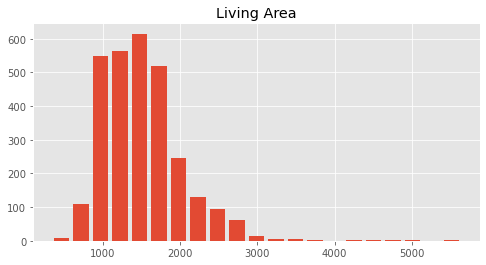

In [8]:
# Living Area - How big are houses
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    housingdf['Gr Liv Area'].mean(), housingdf['Gr Liv Area'].median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    housingdf['Gr Liv Area'].max(), housingdf['Gr Liv Area'].min()))
housingdf['Gr Liv Area'].hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('Living Area')
plt.show()

The average garage has 473 sq ft of space, the median 480 sq ft
The biggest garage has 1,488 sq ft of space, the smallest 0 sq ft


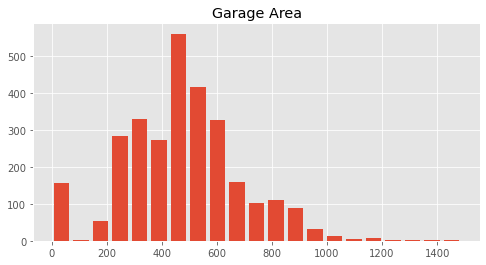

In [9]:
# Living Area - How big are houses
print('The average garage has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    housingdf['Garage Area'].mean(), housingdf['Garage Area'].median()))
print('The biggest garage has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    housingdf['Garage Area'].max(), housingdf['Garage Area'].min()))
housingdf['Garage Area'].hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('Garage Area')
plt.show()

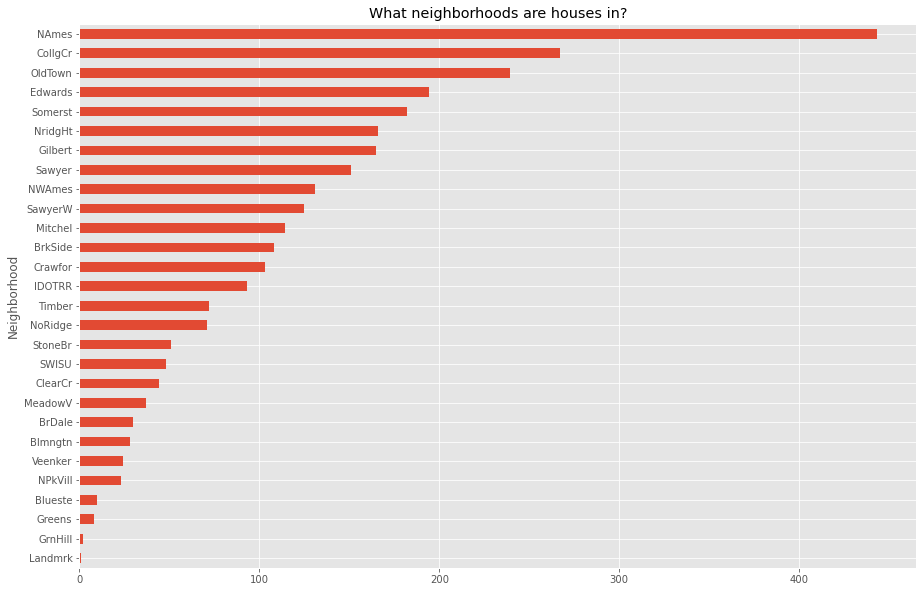

In [10]:
# Where are houses?
housingdf.groupby('Neighborhood').PID.count().\
    sort_values().\
    plot(kind='barh', figsize=(15,10))
plt.title('What neighborhoods are houses in?')
plt.show()

We can see that large majority of houses are in NorthAmes, CollectCreek, OldTown.

We should see how these feature correlate with the Sales Price. 

<Figure size 720x432 with 0 Axes>

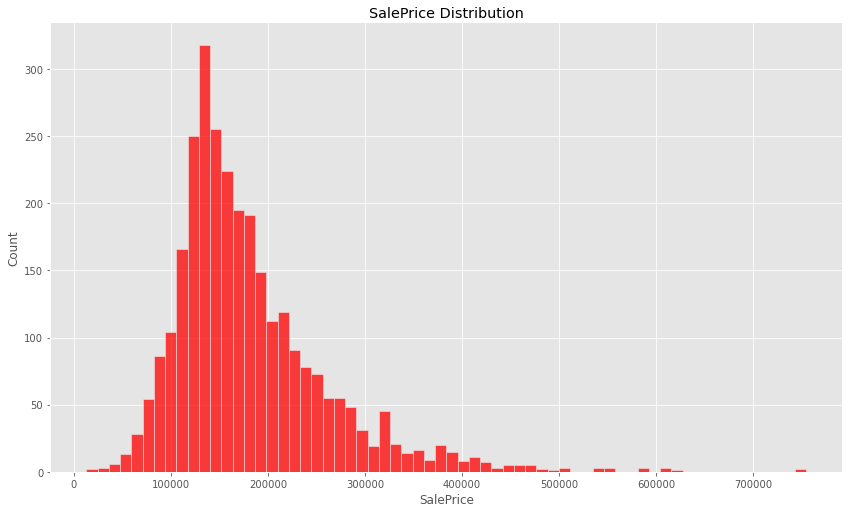

Skewness Score: 1.7435000757376466
Kurtosis Score: 5.118899951130896


In [11]:
# Let's start with our dependent variable, SalePrice
plt.figure(figsize=(10,6))
sns.displot(housingdf['SalePrice'], height=7, aspect=1.7, color='red')
plt.title('SalePrice Distribution')
plt.show()

print('Skewness Score:', (housingdf['SalePrice'].skew()))
print('Kurtosis Score:', (housingdf['SalePrice'].kurtosis()))


 We can see data is postively skewed therefore there are outliers with this feature majorly towards the right side i.e higher sale prices
    We will deal with these outliers while doing multivariate analysis. We will do univariate analysis on the data first to look over 

#### Univariate Analysis for Categorical Variables

we will draw historgrams to understand the distribution of numerical values

<Figure size 432x288 with 0 Axes>

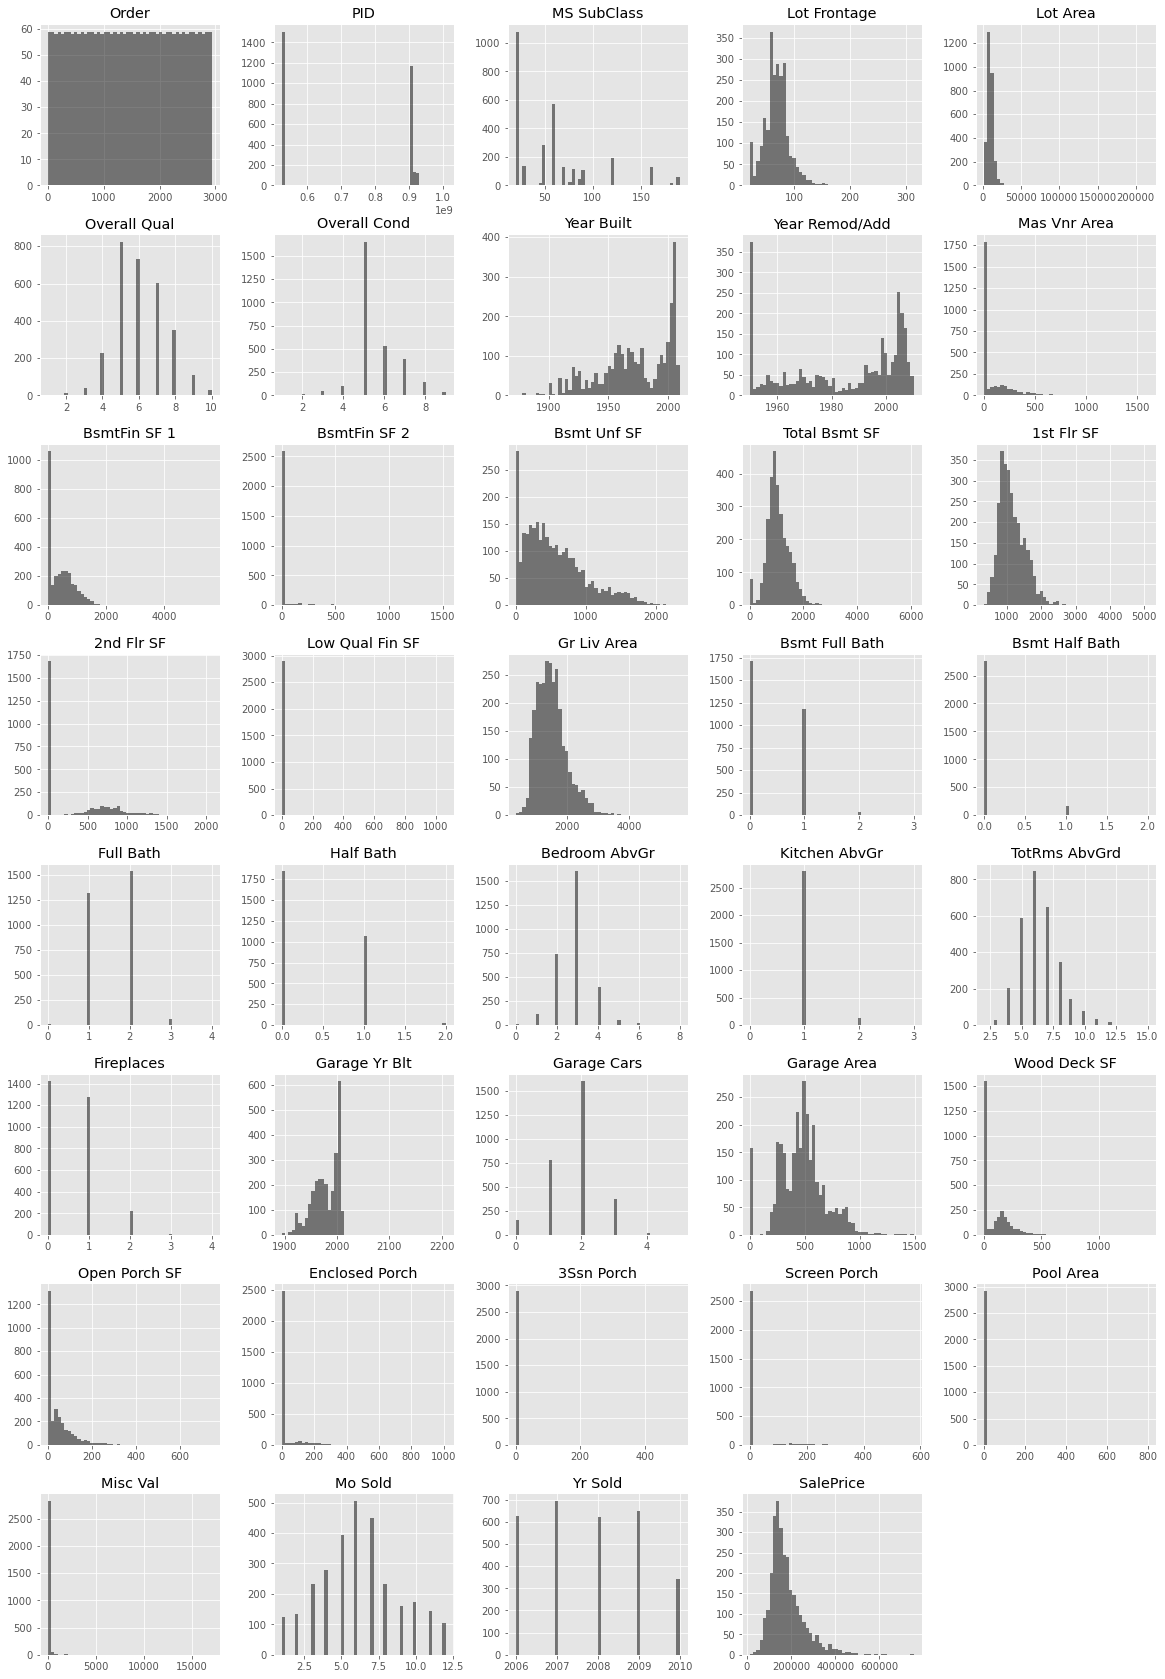

In [12]:
plt.figure()
housingdf.hist(layout=(8,5),color='k', alpha=0.5, bins=50,figsize=(20,30));

We can see some numerical features have no variance so they will not be useful for our analysis - 
MasVNRArea BsmtFinSF2, 2ndFlrSF, LowQualFinSF, BsmtHalfBath, MiscVal, PoolArea, ScreenPorch,3SsnPorch, EnclosedPorch

we will determine the correlation of these features to our target variable. We will plot a heatmap later to determine the correlation

#### Univariate Analysis for Categorical Variables

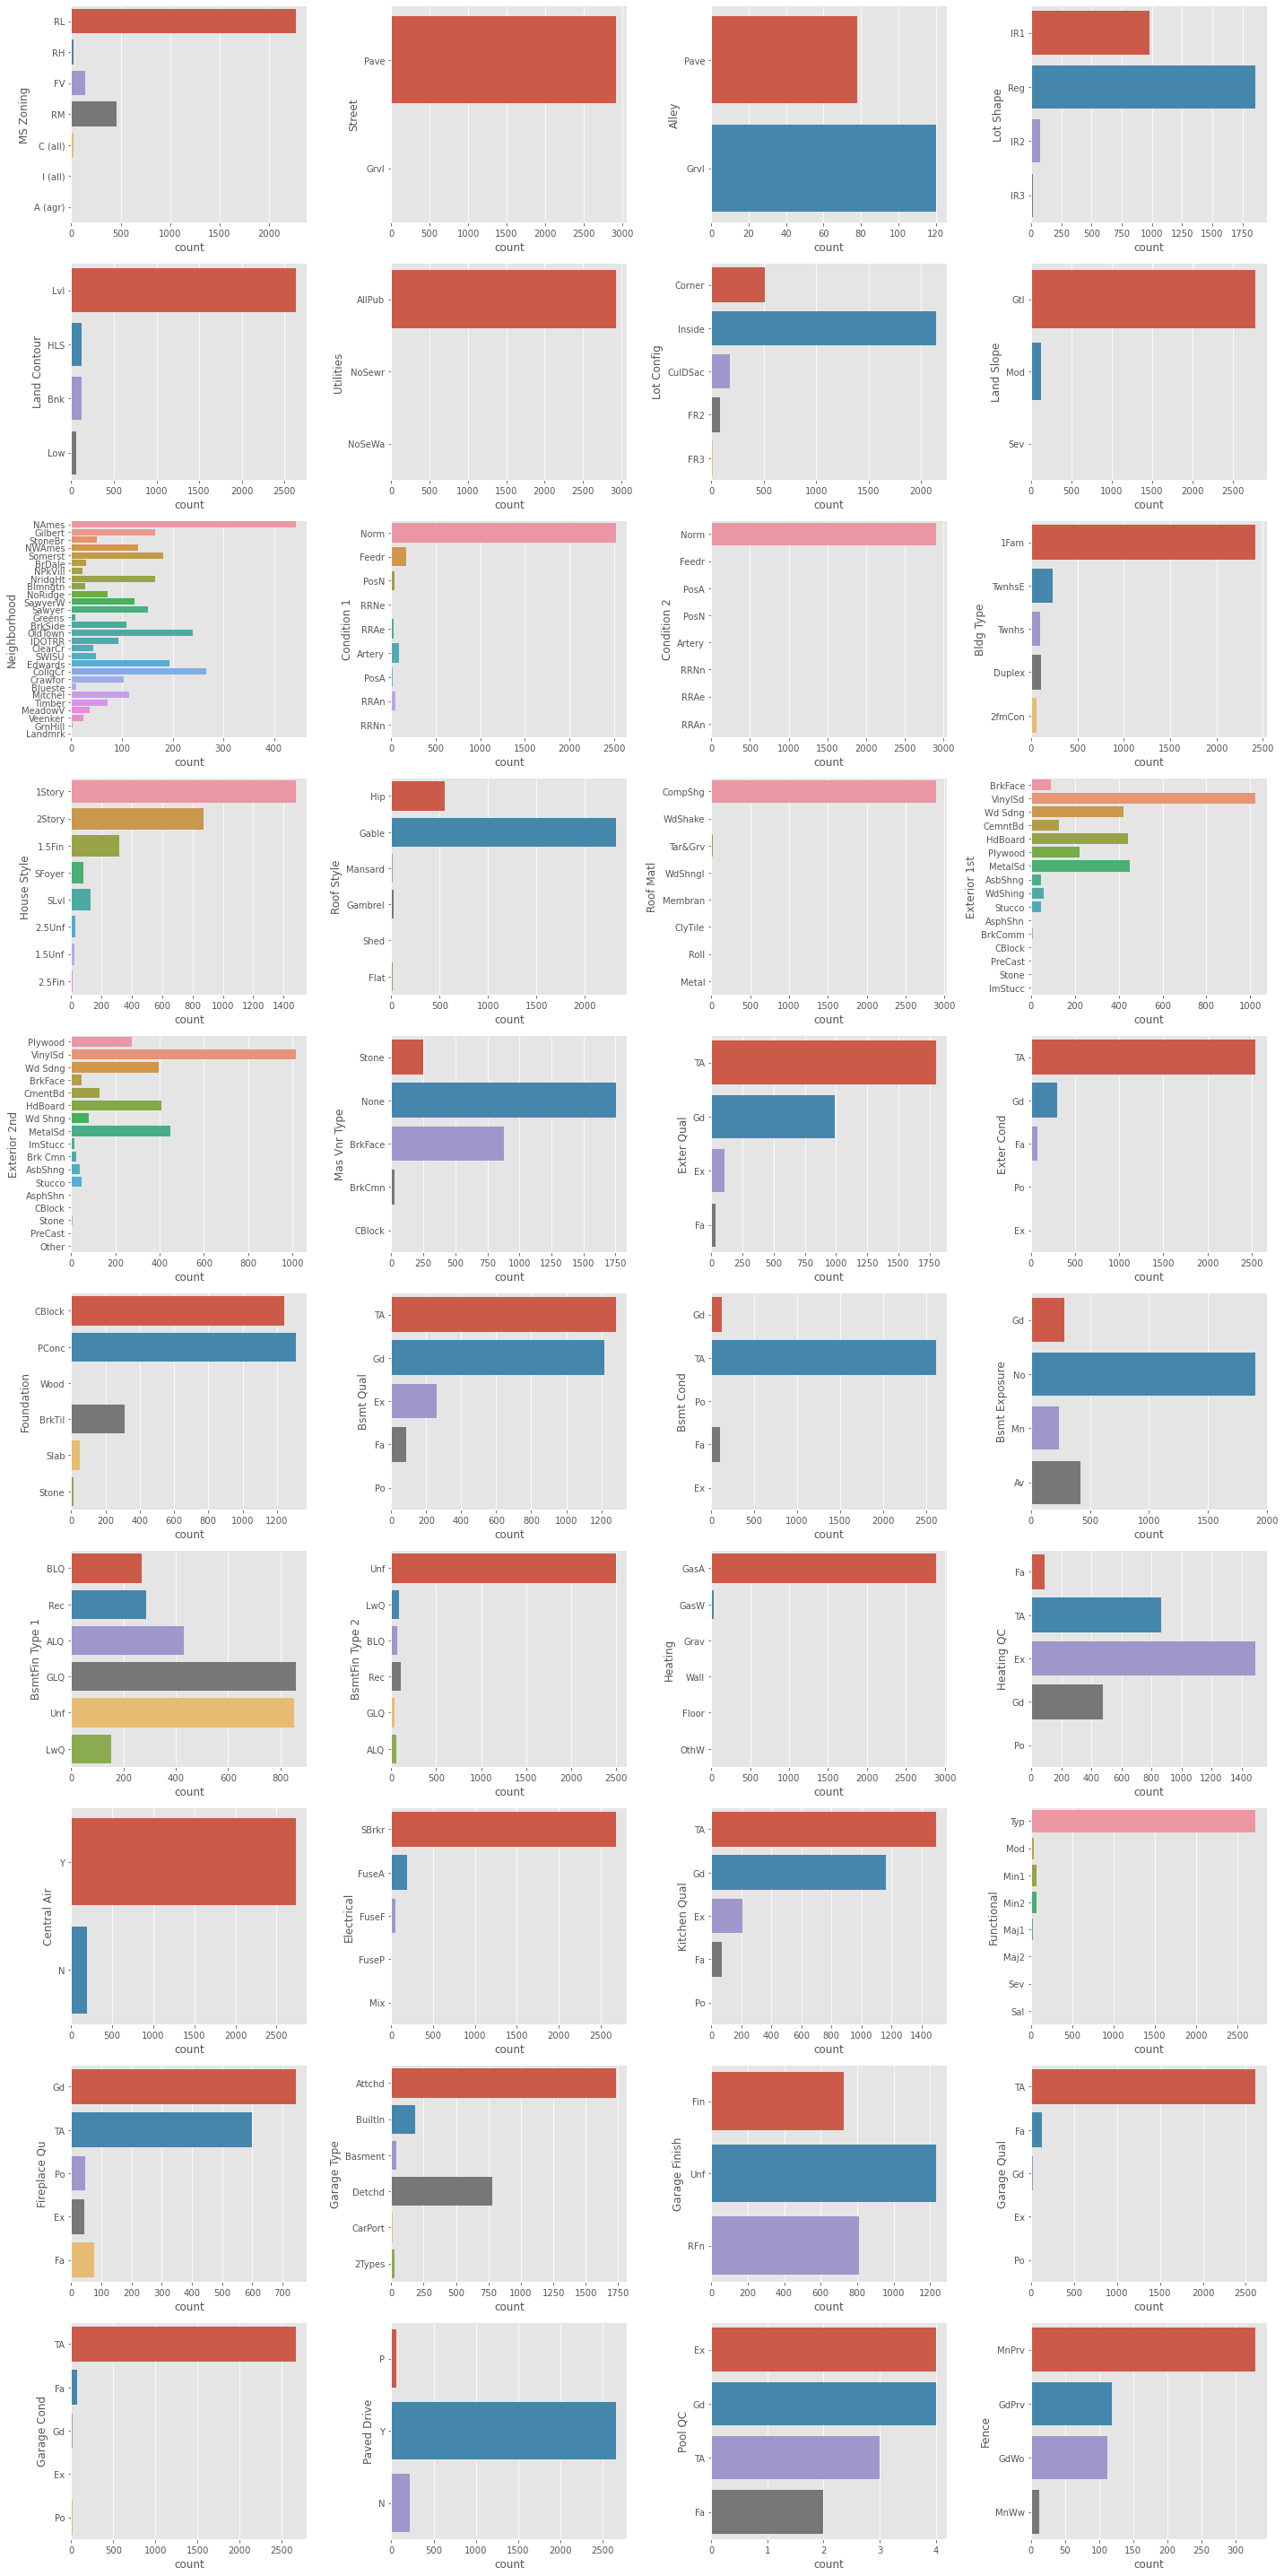

In [13]:
# Plot bar plot for each categorical feature
fig, axes =plt.subplots(10,4, figsize=(20,40))
axes = axes.flatten()
for ax, catplot in zip(axes, housingdf.dtypes[catcols].index):
    sns.countplot(y=catplot, data=housingdf, ax=ax)

plt.tight_layout()  
plt.show()

1. As we can see, some of the categorical variables have no use to us. SO we can remove these
MSZoning, LotShape, LotConfig, Neighborhood, Condition1, BldgType, Housestyle, Roofstyle, ExterQual, 
ExterCond, BsmtCond, BsmtFinType1, HeatingQC, CentralAir, KitchenQual, GarageType, GarageQual

2. we note that there are plenty of feature were one value is heavily overrpresented, this might be helpful in detecting outliers

3. categorical features actually contain rank information in them and should thus be converted to discrete quantitative features. 

### Bivariate and multivariate analysis

#### Numerical data

In [14]:

correaltion = housingdf.corr()
correaltion.style.background_gradient()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,-0.032321,-0.002773,0.005780,-0.028719,-0.013201,-0.000417,0.013589,-0.009342,-0.042539,0.024978,-0.044985,-0.039749,0.015424,-0.017685,0.002612,-0.019156,-0.051160,-0.036185,-0.035435,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,-0.001145,-0.087707,-0.189642,-0.141902,-0.003289,0.056940,-0.107579,-0.037759,0.004328,-0.171431,-0.166636,0.006345,0.076470,-0.068981,-0.108056,-0.256829,-0.237484,-0.210606,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,-0.130421,-0.219445,-0.247828,0.304237,0.025765,0.068061,0.013701,-0.003329,0.134631,0.175879,-0.019208,0.257698,0.031898,-0.049955,0.088754,-0.045883,-0.103239,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,0.045999,0.116743,0.353773,0.457391,0.029187,0.005249,0.383822,0.108915,-0.024724,0.184521,0.041880,0.240442,0.005407,0.353137,0.257255,0.076306,0.308706,0.358505,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,0.023658,0.253589,0.332235,0.032996,0.000812,0.285599,0.125877,0.026903,0.127433,0.035497,0.136569,-0.020301,0.216597,0.256989,-0.008952,0.179512,0.212822,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,0.270058,0.547294,0.477837,0.241402,-0.048680,0.570556,0.167858,-0.041647,0.522263,0.268853,0.063291,-0.159744,0.380693,0.393007,0.570569,0.599545,0.563503,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,-0.136819,-0.173344,-0.157052,0.006218,0.009175,-0.115643,-0.042766,0.084455,-0.214316,-0.088127,-0.006137,-0.086386,-0.089816,-0.031702,-0.326017,-0.181557,-0.153754,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,0.128998,0.407526,0.310463,0.016828,-0.144282,0.241726,0.211849,-0.030626,0.469406,0.269268,-0.055093,-0.137852,0.111919,0.170672,0.834849,0.537443,0.480131,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,0.164805,0.297481,0.242108,0.158939,-0.060365,0.316855,0.134387,-0.046292,0.457266,0.211771,-0.021536,-0.142404,0.197528,0.133322,0.652310,0.425403,0.376438,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,0.091668,0

/Users/tanimish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


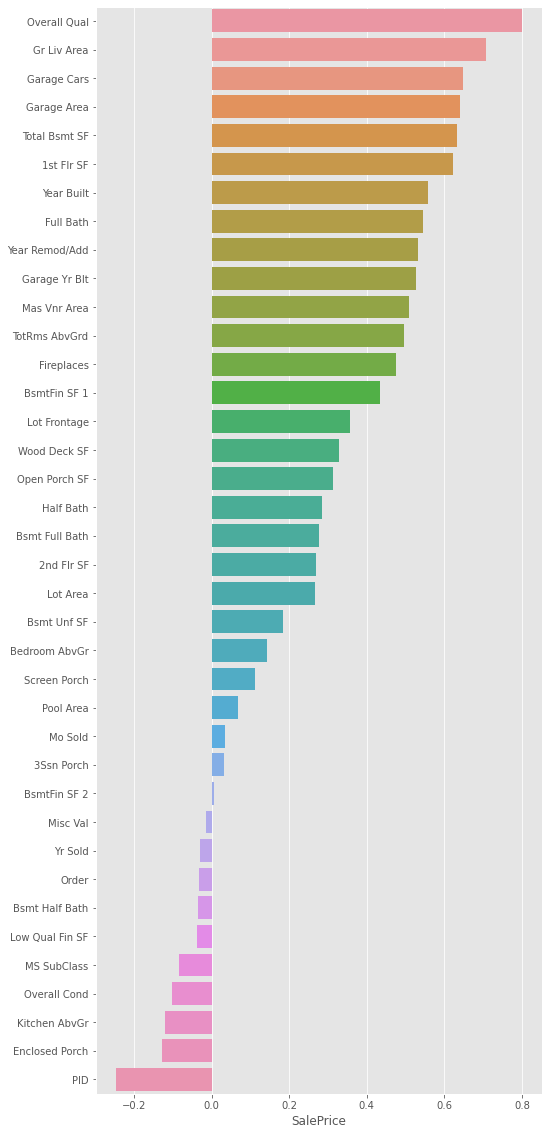

In [15]:
# Feature sorted by correlation to SalePrice, from positive to negative
corr = correaltion.sort_values('SalePrice', ascending=False)
corr
plt.figure(figsize=(8,20))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

The visualization above shows the features correlation with Sales Price in ascending order.

We see that OverallQual, GrLivArea, Total Bsmt SF, 1st Flr SF, Year Built are highly correlated with Sales Price which makes sense intuitively too. Although we see that Garage Cars and Garage Area are also one of the highly correlated features, which isnt that obvious

In regression we usually want to avoid including predictors highly correlated with one another to minimize multicollinearity

In [16]:
#retaining cols with correaltion greater than .25 and less than .85. 
cor_num = housingdf.corr()["SalePrice"].abs().sort_values(ascending = False)
corr_num_cols = cor_num[(cor_num>0.25) & (cor_num<0.85)].index
corr_num_cols

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd',
       'Fireplaces', 'BsmtFin SF 1', 'Lot Frontage', 'Wood Deck SF',
       'Open Porch SF', 'Half Bath', 'Bsmt Full Bath', '2nd Flr SF',
       'Lot Area'],
      dtype='object')

We will be reatining above numerical columns for our analysis.

<AxesSubplot:>

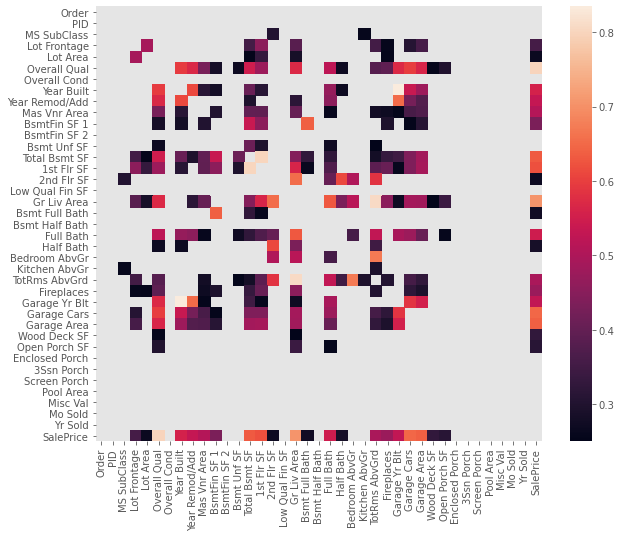

In [17]:
kot = correaltion[(correaltion>=.25) & (correaltion<0.85)]
plt.figure(figsize=(10,8))
sns.heatmap(kot)

The above heatmap shows features that have correlation coefficient between 0.25 and 0.85 and should be kept for further analysis.
Low correlation coefficent would determine that features arent related with each other, so we have removed them. Also, high correlation coefficent would mean that there are outliers in the data. Correlation coefficient of 1 typically shows the feature related with itself. 

#### Categorical data

In [18]:


LE = LabelEncoder()

#filter categorical cols into new dataframe
categoricalcols = housingdf.filter(housingdf.dtypes[catcols].index, axis=1)
#drop na columns where all cols = NA
categoricalcols = categoricalcols.dropna(how='all')
# replace NaN with empty string
categoricalcols = categoricalcols.replace(np.nan, '', regex=True)
#apply label encoder
categoricalcols = categoricalcols.apply(LabelEncoder().fit_transform)
#append sale price to new df
categoricalcols['SalePrice'] = housingdf['SalePrice']    
categoricalcols.head(5)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition,SalePrice
0,5,1,0,0,3,0,0,0,15,2,...,1,5,5,1,0,0,0,9,4,215000
1,4,1,0,3,3,0,4,0,15,1,...,3,5,5,2,0,3,0,9,4,105000
2,5,1,0,0,3,0,0,0,15,2,...,3,5,5,2,0,0,2,9,4,172000
3,5,1,0,3,3,0,0,0,15,2,...,1,5,5,2,0,0,0,9,4,244000
4,5,1,0,0,3,0,4,0,8,2,...,1,5,5,2,0,3,0,9,4,189900


We have converted all the categorical features to numerical data using LabelEncoder.

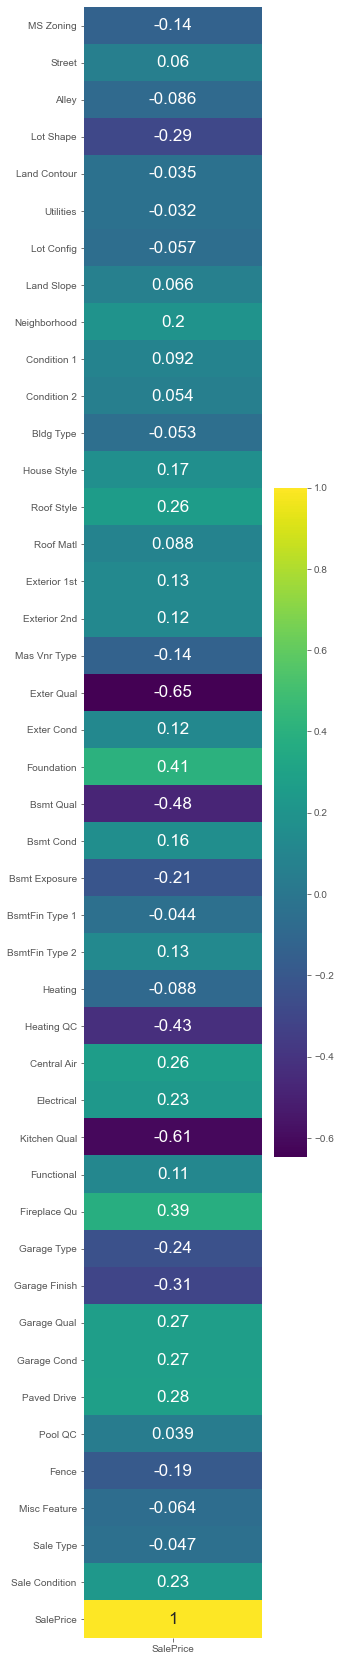

In [19]:

plt.figure(figsize=(4,30))

correaltion_cat = pd.DataFrame({'SalePrice' : categoricalcols.corr()['SalePrice'].values},
                     index = categoricalcols.corr()['SalePrice'].index)
sns.heatmap(correaltion_cat, annot=True, cmap='viridis', annot_kws={"fontsize":17})
sns.set(font_scale = 1.5)

plt.show()



The above feature visualization shows correlation coefficient for all categorical variables.

In [20]:

#retain corr_cat_cols where correaltion is >.25 absolute
corr_cat = categoricalcols.corr()["SalePrice"].abs().sort_values(ascending = False)
corr_cat_cols = corr_cat[(corr_cat>0.25) & (corr_cat<0.85)].index
corr_cat_cols

Index(['Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'Heating QC', 'Foundation',
       'Fireplace Qu', 'Garage Finish', 'Lot Shape', 'Paved Drive',
       'Garage Cond', 'Garage Qual', 'Central Air', 'Roof Style'],
      dtype='object')

It looks like some features show significant variance - Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'Heating QC', 'Foundation','Fireplace Qu', 'Garage Finish', 'Lot Shape', 'Paved Drive','Garage Cond', 'Garage Qual', 'Central Air', 'Roof Style'

From above analysis of categorical and numerical features we extract the important features from each set > where correlation coefficient lies between 0.25-0.85 (absolute) and form a new dataset like done below.

In [21]:
housingdf_feature1 = housingdf[corr_cat_cols]
housingdf_feature2 = housingdf[corr_num_cols]
housingdf_features = pd.concat([housingdf_feature1,housingdf_feature2], axis=1)
housingdf_features['SalePrice'] = housingdf['SalePrice']
housingdf_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Exter Qual      2930 non-null   object 
 1   Kitchen Qual    2930 non-null   object 
 2   Bsmt Qual       2850 non-null   object 
 3   Heating QC      2930 non-null   object 
 4   Foundation      2930 non-null   object 
 5   Fireplace Qu    1508 non-null   object 
 6   Garage Finish   2771 non-null   object 
 7   Lot Shape       2930 non-null   object 
 8   Paved Drive     2930 non-null   object 
 9   Garage Cond     2771 non-null   object 
 10  Garage Qual     2771 non-null   object 
 11  Central Air     2930 non-null   object 
 12  Roof Style      2930 non-null   object 
 13  Overall Qual    2930 non-null   int64  
 14  Gr Liv Area     2930 non-null   int64  
 15  Garage Cars     2929 non-null   float64
 16  Garage Area     2929 non-null   float64
 17  Total Bsmt SF   2929 non-null   f

In [22]:
housingdf_features.head()

,Exter Qual,Kitchen Qual,Bsmt Qual,Heating QC,Foundation,Fireplace Qu,Garage Finish,Lot Shape,Paved Drive,Garage Cond,...,Fireplaces,BsmtFin SF 1,Lot Frontage,Wood Deck SF,Open Porch SF,Half Bath,Bsmt Full Bath,2nd Flr SF,Lot Area,SalePrice
0,TA,TA,TA,Fa,CBlock,Gd,Fin,IR1,P,TA,...,2,639.0,141.0,210,62,0,1.0,0,31770,215000
1,TA,TA,TA,TA,CBlock,NaN,Unf,Reg,Y,TA,...,0,468.0,80.0,140,0,0,0.0,0,11622,105000
2,TA,Gd,TA,TA,CBlock,NaN,Unf,IR1,Y,TA,...,0,923.0,81.0,393,36,1,0.0,0,14267,172000
3,Gd,Ex,TA,Ex,CBlock,TA,Fin,Reg,Y,TA,...,2,1065.0,93.0,0,0,1,1.0,0,11160,244000
4,TA,TA,Gd,Gd,PConc,TA,Fin,IR1,Y,TA,...,1,791.0,74.0,212,34,1,0.0,701,13830,189900


### Data Preprocessing 

We now have the dataset with features that we want to work with. We will clean the data - remove missing, NA, convert categorical to numerical and prepare the data for further machine learning analysis.

In [23]:

#drop na columns where all cols = NA
housingdf_features = housingdf_features.dropna(how='all')
# replace NaN with empty string
housingdf_features = housingdf_features.fillna('')
# housingdf_features
le = LabelEncoder()
obj_col = housingdf_features.select_dtypes('object').columns
obj_col
#apply label encoder
for cc in obj_col:
    housingdf_features[cc] = le.fit_transform(housingdf_features[cc].astype(str))

housingdf_features.head(5)

,Exter Qual,Kitchen Qual,Bsmt Qual,Heating QC,Foundation,Fireplace Qu,Garage Finish,Lot Shape,Paved Drive,Garage Cond,...,Fireplaces,BsmtFin SF 1,Lot Frontage,Wood Deck SF,Open Porch SF,Half Bath,Bsmt Full Bath,2nd Flr SF,Lot Area,SalePrice
0,3,4,5,1,1,3,1,0,1,5,...,2,704,39,210,62,0,2,0,31770,215000
1,3,4,5,4,1,0,3,3,2,5,...,0,554,109,140,0,0,1,0,11622,105000
2,3,2,5,4,1,0,3,0,2,5,...,0,942,110,393,36,1,1,0,14267,172000
3,2,0,5,0,1,5,1,3,2,5,...,2,46,122,0,0,1,2,0,11160,244000
4,3,4,3,2,2,5,1,0,2,5,...,1,843,103,212,34,1,1,701,13830,189900


In [24]:
housingdf_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 2929
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Exter Qual      2930 non-null   int64
 1   Kitchen Qual    2930 non-null   int64
 2   Bsmt Qual       2930 non-null   int64
 3   Heating QC      2930 non-null   int64
 4   Foundation      2930 non-null   int64
 5   Fireplace Qu    2930 non-null   int64
 6   Garage Finish   2930 non-null   int64
 7   Lot Shape       2930 non-null   int64
 8   Paved Drive     2930 non-null   int64
 9   Garage Cond     2930 non-null   int64
 10  Garage Qual     2930 non-null   int64
 11  Central Air     2930 non-null   int64
 12  Roof Style      2930 non-null   int64
 13  Overall Qual    2930 non-null   int64
 14  Gr Liv Area     2930 non-null   int64
 15  Garage Cars     2930 non-null   int64
 16  Garage Area     2930 non-null   int64
 17  Total Bsmt SF   2930 non-null   int64
 18  1st Flr SF      2930 non-nul

We have converted categorical values to numerical, removed missing columns and NaN values.  We will be using this dataset for our further analysis

#### Partition

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y = housingdf_features['SalePrice']
housingdf_model = housingdf_features.drop(columns = 'SalePrice')

In [27]:
# Split data intro train and test data sets
X_train, X_test, y_train, y_test =  train_test_split(housingdf_model.copy(), y, test_size=0.3, random_state=16)
print('Shapes')
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Shapes
X_train: (2051, 34)
X_test: (879, 34)
y_train: (2051,)
y_test: (879,)


In [28]:
# scaling the data using standard scaler
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
stdscaler=stdscaler.fit(X_train)
x_train_scaled=stdscaler.transform(X_train)
x_test_scaled=stdscaler.transform(X_test)

#### Machine Learning Models

##### Comparing multiple models 

Since we are predicting a discrete feature (Sales price), we will apply regression algorithms.
For our analysis we will apply 5 regression algorithms using 10 fold crossvalidation to predict Sales Price. We will compute Cross Validation Socre (Accuracy), Mean Square Error and R2 for each algorithm.

In [30]:

#model instantiation
LG = LinearRegression()
KN = KNeighborsRegressor()
DT = DecisionTreeRegressor(random_state=100)
GB = GradientBoostingRegressor(random_state=100)
RF = RandomForestRegressor(random_state=100)

models = [LG, 
          KN, 
          DT, 
          GB,
          RF]
modelName = [ 'Linear Regression', 
             'K Nearest Neighbor', 
              'Decision Tree'
             , 'Gradient Boost'
             , 'Random Forest' ]

#10 fild cross validation
kf = KFold(n_splits=10)
cvscore = []
means = []
r2_scores = []
X = np.array(housingdf_model.copy())

res= []


#this method takes the model, test data(X) & train data as input. We split the data and fir the model, return the r2, CV score and SE for each model
def runmodel(currentModel, X, y, modelName):
    result = dict()
    meanerrors = []
    r2s = []

    for train_index, test_index in kf.split(X):
        X_train , X_test = X[train_index], X[test_index]
        y_train , y_test = y[train_index] , y[test_index]

        currentModel.fit(X_train, y_train)
        pred_values = currentModel.predict(X_test)

        meanerror = mean_absolute_error(pred_values, y_test)
        r2 = r2_score(y_test, pred_values)

        meanerrors.append(meanerror)
        r2s.append(r2)
    result['Models']    = mname
    result['CV Score'] =  np.mean(cross_val_score(currentModel , X_train, y_train, cv = kf))
    result['Mean Absolute Error'] = np.mean(meanerrors)
    result['R2 Score'] = np.mean(r2s)                              
    return result


In [37]:
analysis = []
for i in range(len(models)):
    currentModel = models[i]
    mname = modelName[i]
    meanerrors = []
    r2s = []
    res = runmodel(currentModel, X, y, mname)
    print(pd.DataFrame(res.items()))
    analysis.append(pd.DataFrame(res.items()))
    


                     0                  1
0               Models  Linear Regression
1             CV Score           0.782249
2  Mean Absolute Error       21699.942652
3             R2 Score           0.804659
                     0                   1
0               Models  K Nearest Neighbor
1             CV Score            0.574900
2  Mean Absolute Error        30623.222526
3             R2 Score            0.612002
                     0              1
0               Models  Decision Tree
1             CV Score       0.721695
2  Mean Absolute Error   24299.988055
3             R2 Score       0.719217
                     0               1
0               Models  Gradient Boost
1             CV Score        0.865678
2  Mean Absolute Error    16464.746152
3             R2 Score        0.875809
                     0              1
0               Models  Random Forest
1             CV Score       0.847828
2  Mean Absolute Error   16887.279241
3             R2 Score       0.861955


We see the GradientBoostingRegressor has the best R2(0.875), CV Score ( 0.865) and MSE (16464.75).
RandomForestRegressor comes close with R2(0.861), CV Score ( 0.847) and MSE (16887.27).
Linear Regression also performs decently with R2(0.805), CV Score (0.78) and MSE (21699.94).

We can see that Gradient Boost, Random Forest and Linear Regression show thebest results, so we will analyze the three models

#### Hyperparameters tuning

In [93]:
#check for hyper parameters available for tuning each model
newmodels = [LG, RF, GB]
newmodelName = [ 'Linear Regression', 'Random Forest' , 'Gradient Boost']

for model in newmodels:
    print(model, model.get_params(deep = True), "\n")


LinearRegression() {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False} 

RandomForestRegressor(random_state=100) {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 100, 'verbose': 0, 'warm_start': False} 

GradientBoostingRegressor(random_state=100) {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 100, 'subsample': 1.

We see the hyperparameters avaiable for tuning each algorithm - Gradient Bosst, Random Forest and Linear Regression.
From the above list we pick ~2-3 hyperparameters for each algorithm for tuning.

In [95]:


hyperparameter_linearRegression = {
    'n_jobs': [100, 200],
    'fit_intercept' : [True, False] ,
    'normalize' : [True, False] ,
    'copy_X' : [False, True]
}

hyperparameter_gradientBoost = {
    'loss' : [ 'lad', 'huber', 'quantile', 'ls'],
    'learning_rate' : [0.1],
    'min_samples_split' : [50, 100],
    'criterion' : ['friedman_mse', 'mse', 'mae'],
}

hyperparameter_randomForest = {
    'n_estimators' : [100,120],
    'criterion' : ['mse', 'mae'],
    'max_depth' : [10,15,30],
    'max_features': [5, 10], 
    'bootstrap': [True, False]
}

hyperparameters = [hyperparameter_linearRegression, 
                   hyperparameter_randomForest,
                  hyperparameter_gradientBoost]

In [96]:
for i in range(3):
    clf = GridSearchCV(newmodels[i],hyperparameters[i] , n_jobs=2,
                   cv=None,
                       scoring="neg_mean_absolute_error")
    clf.fit(X_train, y_train)
    print(f'{newmodelName[i]}:')
    print("Best parameters:")
    print(clf.best_params_)
    print('')

Linear Regression:
Best parameters:
{'copy_X': False, 'fit_intercept': True, 'n_jobs': 100, 'normalize': False}

Random Forest:
Best parameters:
{'bootstrap': False, 'criterion': 'mae', 'max_depth': 30, 'max_features': 5, 'n_estimators': 120}

Gradient Boost:
Best parameters:
{'criterion': 'mae', 'learning_rate': 0.1, 'loss': 'ls', 'min_samples_split': 100}



Comparing models after hyperparameter tuning

In [97]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance:', model)
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


Linear Regression

In [130]:

base_model = LinearRegression(copy_X= False, fit_intercept= True, normalize= True)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance: LinearRegression(copy_X=False, normalize=True)
Average Error: 21435.3339 degrees.
Accuracy = 87.12%.


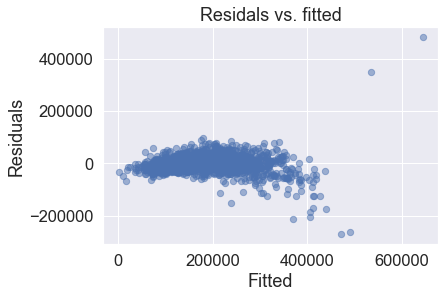

In [128]:
## Visualize Regression Line


# plt.figure(figsize=(6, 3))
# plt.scatter(y_test, y_pred)
# # plt.plot([0, 50], [0, 50], '--k')
# plt.axis('tight')
# plt.tight_layout()
# plt.xlabel('True price')
# plt.ylabel('Predicted price ')
# plt.show()

plt.scatter(LG.predict(X_train), LG.predict(X_train)-y_train, c='b', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax=50)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.title("Residals vs. fitted")
plt.show()

In [166]:

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {LG.coef_[idx-1]}")

The coefficient for Exter Qual is 1.8767929074599097
The coefficient for Kitchen Qual is -12315.128034426782
The coefficient for Bsmt Qual is -5935.746414120098
The coefficient for Heating QC is -3250.8709796536523
The coefficient for Foundation is -1028.593062062885
The coefficient for Fireplace Qu is -2192.31627156794
The coefficient for Garage Finish is -2963.851540156554
The coefficient for Lot Shape is -774.781394944618
The coefficient for Paved Drive is -1715.7262108640998
The coefficient for Garage Cond is 3438.0368134578302
The coefficient for Garage Qual is 613.0903199368756
The coefficient for Central Air is -1545.575115656496
The coefficient for Roof Style is 9559.710718231401
The coefficient for Overall Qual is 3971.2686044165657
The coefficient for Gr Liv Area is 14374.430574846025
The coefficient for Garage Cars is 3.516916556660235
The coefficient for Garage Area is 12584.871571033935
The coefficient for Total Bsmt SF is 10.866487049001067
The coefficient for 1st Flr SF 

Random Forest 

In [133]:
base_model = RandomForestRegressor(criterion= 'mae', max_depth= 15,
                                   n_estimators = 120, random_state = 100)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance: RandomForestRegressor(criterion='mae', max_depth=15, n_estimators=120,
                      random_state=100)
Average Error: 16621.4365 degrees.
Accuracy = 90.13%.


In [134]:
## Feature Importance

base_model.fit(X_train, y_train)
feature_imp = pd.DataFrame(base_model.feature_importances_, index=X_train.columns,
columns=['importance']).sort_values('importance', ascending=False)
feature_imp

,importance
Overall Qual,0.369948
Gr Liv Area,0.111242
Garage Cars,0.082839
1st Flr SF,0.067083
Lot Area,0.037827
Year Built,0.031818
Total Bsmt SF,0.031210
Garage Area,0.027651
Year Remod/Add,0.023369
BsmtFin SF 1,0.022500


Gradient Boost

In [100]:
base_model = GradientBoostingRegressor(criterion= 'mae', learning_rate= 0.1, loss= 'ls',
                                   n_estimators = 300, random_state = 100)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance: GradientBoostingRegressor(criterion='mae', n_estimators=300, random_state=100)
Average Error: 15793.2804 degrees.
Accuracy = 90.63%.


As you can see that after parameters' hypertuning Gradient Boost performs best among other regression models, having lowest Mean Absolute Error and Highest r2_Score